In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io as sio
from sklearn.model_selection import train_test_split

In [2]:
X = np.load('.//data//dataset.npy')
Y = np.load('.//data//datalabel.npy')
# binary classification only use the 1st 2 classes.
X = X[:5000]
Y = Y[:5000]
X_train, X_val, Y_train, Y_val = train_test_split(X, Y,
                                                  test_size = 0.2, random_state=1)
print(X_train.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_val.shape)

(4000, 2)
(1000, 2)
(4000, 3)
(1000, 3)


In [4]:
def sign(a):
    y_hat = [0]*len(a)
    for i in range(len(a)):
        if a[i]<=0:
            y_hat[i] = -1
        else:
            y_hat[i] = 1
    return y_hat

In [13]:
def loss_f(x,y,w,b):
    a = np.dot(x,w) + b
    y_label = np.array([0]*len(x))
    summ = 0
    for i in range(len(x)):
        if y[i][0] == 1:
            y_label[i] = 1
        else:
            y_label[i] = -1
        if y_label[i] == 1 and a[i] < 0 or y_label[i] == -1 and a[i] >= 0:
            summ += -1 * y_label[i] * a[i]
    cost = summ / len(x)
    return cost

In [8]:
def pridict(x,w,b):
    a = np.dot(x,w) + b
    return sign(a)

In [9]:
def accuracy(y, y_hat):
    cnt = 0
    for i in range(len(y)):
        if y[i][0] == 1 and y_hat[i] == 1 or y[i][1] == 1 and y_hat[i] == -1:
            cnt += 1
    return cnt/len(y)

1
training_acc: 0.864000, training_loss: 0.047468, val_acc: 0.854000, val_loss: 0.049165
11
training_acc: 0.910750, training_loss: 0.025417, val_acc: 0.903000, val_loss: 0.026633
21
training_acc: 0.937000, training_loss: 0.015513, val_acc: 0.933000, val_loss: 0.016539
31
training_acc: 0.953750, training_loss: 0.010555, val_acc: 0.947000, val_loss: 0.011465
41
training_acc: 0.964500, training_loss: 0.007566, val_acc: 0.959000, val_loss: 0.008495
51
training_acc: 0.972250, training_loss: 0.005691, val_acc: 0.963000, val_loss: 0.006358
61
training_acc: 0.976500, training_loss: 0.004482, val_acc: 0.970000, val_loss: 0.004894
71
training_acc: 0.979500, training_loss: 0.003641, val_acc: 0.974000, val_loss: 0.003942
81
training_acc: 0.982750, training_loss: 0.003001, val_acc: 0.979000, val_loss: 0.003200
91
training_acc: 0.985250, training_loss: 0.002554, val_acc: 0.979000, val_loss: 0.002650
101
training_acc: 0.987000, training_loss: 0.002187, val_acc: 0.983000, val_loss: 0.002193
111
traini

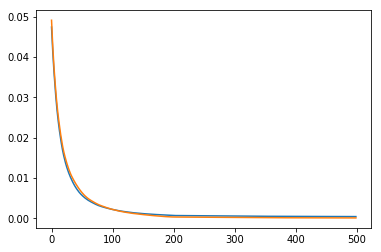

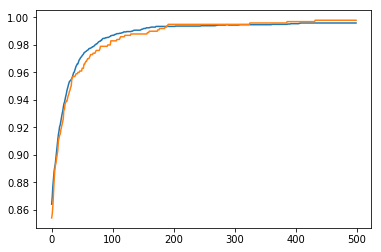

In [30]:
# init w,b
w = np.random.rand(2,1)
b = np.random.rand(1)

# start
epoch = 500
iternum = epoch
eta = 0.1
loss = {'training_loss':[], 'val_loss':[]}
acc = {'training_acc':[], 'val_acc':[]}
flag = 0
while epoch > 0:
    a = np.dot(X_train, w)
    d_w = np.zeros([2,1])
    d_b = 0
    if epoch < 300 and flag == 0:
        eta = 0.02
        flag = 1
    
    for i in range(len(X_train)):
        if a[i] > 0 and Y_train[i][0] == 1 or a[i] < 0 and Y_train[i][1] == 1:
            continue
        else:
            yi = 0
            if Y_train[i][0] == 1:
                yi = 1
            else:
                yi = -1
            d_w += yi*(X_train[i].reshape((2,1)))
            d_b += yi
            
    d_w = d_w/len(X_train)
    d_b = d_b/len(X_train)
    w = w + eta*d_w
    b = b + eta*d_b
    
    # restore history
    loss['training_loss'].append(loss_f(X_train, Y_train, w, b))
    loss['val_loss'].append(loss_f(X_val, Y_val, w, b))
    Y_train_hat = pridict(X_train, w, b)
    Y_val_hat = pridict(X_val, w, b)
    acc['training_acc'].append(accuracy(Y_train, Y_train_hat))
    acc['val_acc'].append(accuracy(Y_val, Y_val_hat))
    
    if epoch%10 == 0:
        print('=======================')
        print(iternum-epoch+1)
        print('training_acc: %f, training_loss: %f, val_acc: %f, val_loss: %f'
              %(acc['training_acc'][iternum-epoch], loss['training_loss'][iternum-epoch], 
                acc['val_acc'][iternum-epoch], loss['val_loss'][iternum-epoch]))
    epoch -= 1
    
# Plot 
plt.figure(1)
plt.plot(loss['training_loss'])
plt.plot(loss['val_loss'])

plt.figure(2)
plt.plot(acc['training_acc'])
plt.plot(acc['val_acc'])

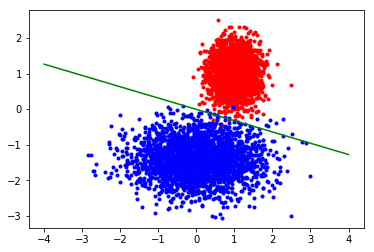

In [39]:
x1 = [-4, 4]
x2 = [0,0]
x2[0] = (w[0][0]*x1[0] + b)/(-w[1][0])
x2[1] = (w[0][0]*x1[1] + b)/(-w[1][0])
plt.figure(1)
plt.plot(X[:2500, 0], X[:2500, 1], 'r.')
plt.plot(X[2500:5000, 0], X[2500:5000, 1], 'b.')
plt.plot(x1, x2, 'g')